In [2302]:
import pandas as pd
import numpy as np

In [2303]:
df=pd.read_csv('train.csv')

## Preprocessing

In [2304]:
df.describe()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
count,4.565480e+05,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000
mean,1.250096e+06,74.768771,82.105796,2024.337458,332.238933,354.156627,0.081152,0.10920,261.872760
std,1.443548e+05,41.524956,45.975046,547.420920,152.939723,160.715914,0.273069,0.31189,395.922798
min,1.000000e+06,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.00000,13.000000
25%,1.124999e+06,39.000000,43.000000,1558.000000,228.950000,243.500000,0.000000,0.00000,54.000000
50%,1.250184e+06,76.000000,76.000000,1993.000000,296.820000,310.460000,0.000000,0.00000,136.000000
75%,1.375140e+06,111.000000,110.000000,2539.000000,445.230000,458.870000,0.000000,0.00000,324.000000
max,1.499999e+06,145.000000,186.000000,2956.000000,866.270000,866.270000,1.000000,1.00000,24299.000000


### New Variables creations like ratio of checkout_price and base price , avg demand by centers and meal, Last three weeks demand etc are created

In [2305]:
df['Month'] = df['week'].apply(lambda x: int(x / 4))
df['Year'] = df['week'].apply(lambda x: int(x / 52))
df['Quarter'] = df['week'].apply(lambda x: int(x / 13))

In [2306]:
df['Year'].value_counts()

1    166994
0    151796
2    137758
Name: Year, dtype: int64

In [2307]:
df_1=pd.read_csv('fulfilment_center_info.csv')
df_2=pd.read_csv('meal_info.csv')
df_3=pd.merge(df, df_1, on='center_id')
df_=pd.merge(df_3, df_2, on='meal_id')

In [2308]:
df_test=pd.read_csv('test_QoiMO9B.csv')

In [2309]:
df_test['Month'] = df_test['week'].apply(lambda x: int(x / 4))
df_test['Year'] = df_test['week'].apply(lambda x: int(x / 52))
df_test['Quarter'] = df_test['week'].apply(lambda x: int(x / 13))

In [2312]:
df_.loc[df_['checkout_price'] < df_['base_price'], 'C'] = 1
df_.loc[df_['checkout_price'] > df_['base_price'], 'C'] = 2
df_.loc[df_['checkout_price'] == df_['base_price'], 'C'] = 0

In [2313]:
df_test.loc[df_test['checkout_price'] < df_test['base_price'], 'C'] = 1
df_test.loc[df_test['checkout_price'] > df_test['base_price'], 'C'] = 2
df_test.loc[df_test['checkout_price'] == df_test['base_price'], 'C'] = 0

In [2314]:
df_['ratio']=df_['checkout_price']/df_['base_price']
df_test['ratio']=df_test['checkout_price']/df_test['base_price']

In [2315]:
df_['ratio'] = df_['ratio'].apply(lambda x: 1 if(x<0.5) else x)
df_test['ratio'] = df_test['ratio'].apply(lambda x: 1 if(x<0.5) else x)

In [2316]:
df_3=pd.merge(df_test, df_1, on='center_id')
df_test=pd.merge(df_3, df_2, on='meal_id')

In [2317]:
df_.loc[df_['checkout_price'] <= 100, 'Cat'] = 0
df_.loc[(df_['checkout_price'] > 100) & (df_['checkout_price'] <= 150), 'Cat'] = 1
df_.loc[(df_['checkout_price'] > 150) & (df_['checkout_price'] <= 200), 'Cat'] = 2
df_.loc[(df_['checkout_price'] > 200) & (df_['checkout_price'] <= 300), 'Cat'] = 3
df_.loc[(df_['checkout_price'] > 300) & (df_['checkout_price'] <= 500), 'Cat'] = 4
df_.loc[(df_['checkout_price'] > 500) , 'Cat'] = 5

In [2318]:
df_.loc[df_['base_price'] <= 200, 'Cat_'] = 0
df_.loc[(df_['base_price'] > 200) & (df_['base_price'] <= 400), 'Cat_'] = 1
df_.loc[(df_['base_price'] > 400) & (df_['base_price'] <= 500), 'Cat_'] = 2
df_.loc[(df_['base_price'] > 500) , 'Cat_'] = 3

In [2319]:
df_test.loc[df_test['base_price'] <= 200, 'Cat_'] = 0
df_test.loc[(df_test['base_price'] > 200) & (df_test['base_price'] <= 400), 'Cat_'] = 1
df_test.loc[(df_test['base_price'] > 400) & (df_test['base_price'] <= 500), 'Cat_'] = 2
df_test.loc[(df_test['base_price'] > 500) , 'Cat_'] = 3

In [2320]:
df_test.loc[df_test['checkout_price'] <= 100, 'Cat'] = 0
df_test.loc[(df_test['checkout_price'] > 100) & (df_test['checkout_price'] < 150), 'Cat'] = 1
df_test.loc[(df_['checkout_price'] > 150) & (df_test['checkout_price'] < 200), 'Cat'] = 2
df_test.loc[(df_['checkout_price'] > 200) & (df_test['checkout_price'] < 300), 'Cat'] = 3
df_test.loc[(df_['checkout_price'] > 300) & (df_test['checkout_price'] < 500), 'Cat'] = 4
df_test.loc[(df_['checkout_price'] > 500) , 'Cat'] = 5

In [2321]:
ID='id'
week='week'
target='num_orders'

In [2322]:
df_test.columns

Index([u'id', u'week', u'center_id', u'meal_id', u'checkout_price',
       u'base_price', u'emailer_for_promotion', u'homepage_featured', u'Month',
       u'Year', u'Quarter', u'C', u'ratio', u'city_code', u'region_code',
       u'center_type', u'op_area', u'category', u'cuisine', u'Cat_', u'Cat'],
      dtype='object')

In [2323]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [2324]:
df_test

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,Month,Year,...,C,ratio,city_code,region_code,center_type,op_area,category,cuisine,Cat_,Cat
0,1028232,146,55,1885,158.11,159.11,0,0,36,2,...,1.0,0.993715,647,56,TYPE_C,2.0,Beverages,Thai,0.0,NaN
1,1262649,147,55,1885,159.11,159.11,0,0,36,2,...,0.0,1.000000,647,56,TYPE_C,2.0,Beverages,Thai,0.0,NaN
2,1453211,149,55,1885,157.14,158.14,0,0,37,2,...,1.0,0.993676,647,56,TYPE_C,2.0,Beverages,Thai,0.0,NaN
3,1262599,150,55,1885,159.14,157.14,0,0,37,2,...,2.0,1.012728,647,56,TYPE_C,2.0,Beverages,Thai,0.0,NaN
4,1495848,151,55,1885,160.11,159.11,0,0,37,2,...,2.0,1.006285,647,56,TYPE_C,2.0,Beverages,Thai,0.0,NaN
5,1342607,152,55,1885,159.11,160.11,0,0,38,2,...,1.0,0.993754,647,56,TYPE_C,2.0,Beverages,Thai,0.0,NaN
6,1358429,153,55,1885,159.11,158.11,0,0,38,2,...,2.0,1.006325,647,56,TYPE_C,2.0,Beverages,Thai,0.0,NaN
7,1475006,154,55,1885,160.11,158.11,0,0,38,2,...,2.0,1.012649,647,56,TYPE_C,2.0,Beverages,Thai,0.0,NaN
8,1009709,155,55,1885,158.11,159.11,0,0,38,2,...,1.0,0.993715,647,56,TYPE_C,2.0,Beverages,Thai,0.0,NaN
9,1460444,146,24,1885,158.11,160.11,0,1,36,2,...,1.0,0.987509,614,85,TYPE_B,3.6,Beverages,Thai,0.0,NaN


In [2325]:
columns_encode=['center_id','meal_id','city_code','region_code','center_type','op_area','category','cuisine']
for column in columns_encode:
    le.fit(df_[column])
    le.classes_
    df_[column]=le.transform(df_[column])
    df_test[column]=le.transform(df_test[column])

In [2326]:
df_last=df_.loc[df_.groupby(['center_id','meal_id']).week.idxmax()]
df_last=df_last[['meal_id','center_id','num_orders']]
df_last=df_last.rename(columns={'num_orders':'last_order'})
df_last=df_last.reset_index()

In [2327]:
df_last3=df_[(df_['week']==143) | (df_['week']==144) | (df_['week']==145) ]
df_last3_group=df_last3.groupby(['center_id','meal_id'])[target].mean()
df_group_3=df_last3_group.reset_index()
df_group_3=df_group_3.rename(columns={'num_orders':'avg_3_orders'})
df_group=df_.groupby(['center_id','meal_id'])[target].mean()
df_group=df_group.reset_index()
df_group=df_group.rename(columns={'num_orders':'avg_orders'})
df_new = pd.merge(df_, df_group,  how='left', left_on=['center_id','meal_id'], right_on = ['center_id','meal_id'])
df_new = pd.merge(df_new, df_group_3,  how='left', left_on=['center_id','meal_id'], right_on = ['center_id','meal_id'])
df__ = pd.merge(df_new, df_last,  how='left', left_on=['center_id','meal_id'], right_on = ['center_id','meal_id'])
df_new_2 = pd.merge(df_test, df_group,  how='left', left_on=['center_id','meal_id'], right_on = ['center_id','meal_id'])
df_new_2 = pd.merge(df_new_2, df_group_3,  how='left', left_on=['center_id','meal_id'], right_on = ['center_id','meal_id'])
df_test = pd.merge(df_new_2, df_last,  how='left', left_on=['center_id','meal_id'], right_on = ['center_id','meal_id'])

In [2328]:
df_group=df_.groupby('center_id')[target].mean()
df_group=df_group.reset_index()
df_group_1=df_group.rename(columns={'num_orders':'avg_center'})
df__ = pd.merge(df__, df_group_1,  how='left', left_on=['center_id'], right_on = ['center_id'])
df_test = pd.merge(df_test, df_group_1,  how='left', left_on=['center_id'], right_on = ['center_id'])
df_group=df_.groupby('meal_id')[target].mean()
df_group=df_group.reset_index()
df_group_2=df_group.rename(columns={'num_orders':'avg_meal'})
df__ = pd.merge(df__, df_group_2,  how='left', left_on=['meal_id'], right_on = ['meal_id'])
df_test = pd.merge(df_test, df_group_2,  how='left', left_on=['meal_id'], right_on = ['meal_id'])

In [2329]:
df_

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,Month,...,city_code,region_code,center_type,op_area,category,cuisine,C,ratio,Cat,Cat_
0,1379560,1,23,22,136.83,152.29,0,0,177,0,...,30,3,2,2,0,3,1.0,0.898483,1.0,0.0
1,1018704,2,23,22,135.83,152.29,0,0,323,0,...,30,3,2,2,0,3,1.0,0.891917,1.0,0.0
2,1196273,3,23,22,132.92,133.92,0,0,96,0,...,30,3,2,2,0,3,1.0,0.992533,1.0,0.0
3,1116527,4,23,22,135.86,134.86,0,0,163,1,...,30,3,2,2,0,3,2.0,1.007415,1.0,0.0
4,1343872,5,23,22,146.50,147.50,0,0,215,1,...,30,3,2,2,0,3,1.0,0.993220,1.0,0.0
5,1493612,6,23,22,146.53,146.53,0,0,285,1,...,30,3,2,2,0,3,0.0,1.000000,1.0,0.0
6,1110832,7,23,22,145.53,146.53,0,0,148,1,...,30,3,2,2,0,3,1.0,0.993175,1.0,0.0
7,1461167,8,23,22,146.53,145.53,0,0,135,2,...,30,3,2,2,0,3,2.0,1.006871,1.0,0.0
8,1102364,9,23,22,134.83,134.83,0,0,175,2,...,30,3,2,2,0,3,0.0,1.000000,1.0,0.0
9,1018130,10,23,22,144.56,143.56,0,0,175,2,...,30,3,2,2,0,3,2.0,1.006966,1.0,0.0


In [2330]:
df__.columns

Index([u'id', u'week', u'center_id', u'meal_id', u'checkout_price',
       u'base_price', u'emailer_for_promotion', u'homepage_featured',
       u'num_orders', u'Month', u'Year', u'Quarter', u'city_code',
       u'region_code', u'center_type', u'op_area', u'category', u'cuisine',
       u'C', u'ratio', u'Cat', u'Cat_', u'avg_orders', u'avg_3_orders',
       u'index', u'last_order', u'avg_center', u'avg_meal'],
      dtype='object')

In [2331]:
df_=df__

In [2332]:
df1 = df_[df_.isnull().any(axis=1)]

In [2333]:
df1.describe()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,Month,...,C,ratio,Cat,Cat_,avg_orders,avg_3_orders,index,last_order,avg_center,avg_meal
count,5.263000e+03,5263.000000,5263.000000,5263.000000,5263.000000,5263.000000,5263.000000,5263.000000,5263.000000,5263.000000,...,5263.000000,5263.000000,5263.000000,5263.000000,5263.000000,0.0,5263.000000,5263.000000,5263.000000,5263.000000
mean,1.250273e+06,67.988410,32.422003,24.775793,385.663310,408.496625,0.044651,0.053962,49.397302,16.624359,...,0.994680,0.948955,3.699981,1.710621,49.397302,NaN,308488.581227,32.724872,207.209831,92.759692
std,1.436433e+05,41.084394,21.507257,14.577330,131.978934,132.195769,0.206557,0.225963,63.451113,10.278064,...,0.713907,0.104465,0.863473,0.827625,50.731581,NaN,104779.970021,27.904223,59.374858,66.014322
min,1.000249e+06,1.000000,3.000000,2.000000,45.620000,72.750000,0.000000,0.000000,13.000000,0.000000,...,0.000000,0.500026,0.000000,0.000000,13.666667,NaN,41744.000000,13.000000,121.807005,28.540706
25%,1.123968e+06,32.000000,13.000000,11.000000,281.330000,291.030000,0.000000,0.000000,14.000000,8.000000,...,0.000000,0.991464,3.000000,1.000000,20.526316,NaN,224962.000000,14.000000,163.475709,32.279649
50%,1.248908e+06,68.000000,28.000000,23.000000,412.280000,445.230000,0.000000,0.000000,27.000000,17.000000,...,1.000000,1.000000,4.000000,2.000000,29.200000,NaN,335274.000000,26.000000,192.820431,87.238944
75%,1.374518e+06,103.000000,51.000000,37.000000,484.030000,485.030000,0.000000,0.000000,53.000000,25.000000,...,2.000000,1.001414,4.000000,2.000000,54.562963,NaN,373852.000000,41.000000,250.218527,117.887966
max,1.499807e+06,142.000000,76.000000,50.000000,767.330000,767.330000,1.000000,1.000000,609.000000,35.000000,...,2.000000,1.320000,5.000000,3.000000,242.500000,NaN,455743.000000,325.000000,381.718899,318.171935


In [2334]:
df_['avg_3_orders']=df_['avg_3_orders'].fillna(df_['avg_orders'])

In [2335]:
df_test['avg_3_orders']=df_test['avg_3_orders'].fillna(df_test['avg_orders'])

In [2336]:
avg=df['num_orders'].median()
df_=df_.fillna(avg)
df_test=df_test.fillna(avg)
df_['avg_orders'] = df_['avg_orders'].apply(lambda x: round(x))
df_['avg_3_orders'] = df_['avg_3_orders'].apply(lambda x: round(x))

In [2337]:
avg

136.0

In [2338]:
df_[df_['avg_3_orders']==None]

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,Month,...,C,ratio,Cat,Cat_,avg_orders,avg_3_orders,index,last_order,avg_center,avg_meal


In [2339]:
df_test['avg_orders'] = df_test['avg_orders'].apply(lambda x: round(x))

In [2340]:
df_test['avg_3_orders'] = df_test['avg_3_orders'].apply(lambda x: round(x))

In [2341]:
for column in df_.columns:
    print(type(df_[column]))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.S

In [2342]:
def encodingfunction(df):
    columns_to_encode=['season','holiday','workingday','weather','Time_Category']
    for column in columns_to_encode:
        df[column] = df[column].apply(lambda x: str(x)+column)
        one_hot = pd.get_dummies(df[column])
        # Drop column B as it is now encoded
        df = df.drop(column,axis = 1)
        # Join the encoded df
        df = df.join(one_hot,how='left')
    return df

## Modelling

In [2343]:
from sklearn.ensemble import GradientBoostingRegressor  #GBM algorithm
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search

In [2344]:
def modelfit(target,alg, dtrain,test, predictors, printFeatureImportance=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target])
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    test_predictions = alg.predict(test[predictors])
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, predictors).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')
    return test_predictions

In [2345]:
df_check=df_[df_['center_id']==7]
df_new= df_check[df_check['meal_id']==42]

In [2346]:
df_test.columns

Index([u'id', u'week', u'center_id', u'meal_id', u'checkout_price',
       u'base_price', u'emailer_for_promotion', u'homepage_featured', u'Month',
       u'Year', u'Quarter', u'C', u'ratio', u'city_code', u'region_code',
       u'center_type', u'op_area', u'category', u'cuisine', u'Cat_', u'Cat',
       u'avg_orders', u'avg_3_orders', u'index', u'last_order', u'avg_center',
       u'avg_meal'],
      dtype='object')

In [2347]:
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

In [2348]:
from sklearn import linear_model

In [2349]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 100, oob_score = True, n_jobs = -1,max_features = "auto", min_samples_leaf = 10)


In [2350]:
from sklearn import ensemble

In [2351]:
df_test.columns

Index([u'id', u'week', u'center_id', u'meal_id', u'checkout_price',
       u'base_price', u'emailer_for_promotion', u'homepage_featured', u'Month',
       u'Year', u'Quarter', u'C', u'ratio', u'city_code', u'region_code',
       u'center_type', u'op_area', u'category', u'cuisine', u'Cat_', u'Cat',
       u'avg_orders', u'avg_3_orders', u'index', u'last_order', u'avg_center',
       u'avg_meal'],
      dtype='object')

In [2352]:
best_predictor=[x for x in df_.columns if x not in [ID,target]]

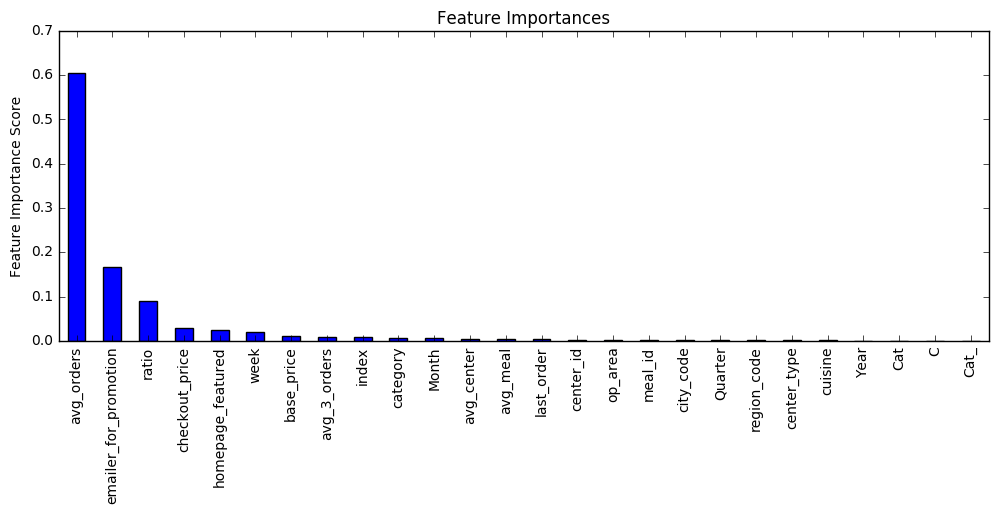

In [2353]:
test_predictions=modelfit(target,model, df_,df_test, best_predictor,True)
#val=rmsle(list(test_predictions),list(test['']))

In [2354]:
test_predictions=np.floor(test_predictions)

In [2355]:
test_predictions

array([ 134.,  135.,  131., ...,   50.,   50.,   50.])

In [2356]:
test_new=df_test

In [2357]:
test_new[target]=list(test_predictions)

In [2358]:
test_new=test_new[[ID,target]]

In [2359]:
test_new.to_csv('submission.csv',index=False)

In [626]:
test.dtypes

index                int64
temp               float64
atemp              float64
humidity             int64
windspeed          float64
casual               int64
registered           int64
count                int64
1season              uint8
2season              uint8
3season              uint8
4season              uint8
0holiday             uint8
1holiday             uint8
0workingday          uint8
1workingday          uint8
1weather             uint8
2weather             uint8
3weather             uint8
4weather             uint8
0Time_Category       uint8
10Time_Category      uint8
11Time_Category      uint8
12Time_Category      uint8
13Time_Category      uint8
14Time_Category      uint8
15Time_Category      uint8
16Time_Category      uint8
17Time_Category      uint8
18Time_Category      uint8
19Time_Category      uint8
1Time_Category       uint8
20Time_Category      uint8
21Time_Category      uint8
22Time_Category      uint8
23Time_Category      uint8
2Time_Category       uint8
3

In [1980]:
def rmsle(real, predicted):
    sum=0.0
    for x in range(len(predicted)):
        if predicted[x]<0 or real[x]<0: #check for negative values
            continue
        p = np.log(predicted[x]+1)
        r = np.log(real[x]+1)
        sum = sum + (p - r)**2
    return (sum/len(predicted))**0.5

In [2154]:
best_predictors=[]
from sklearn.ensemble import RandomForestRegressor
rfModel = RandomForestRegressor(n_estimators=200,n_jobs = -1)

def best_variables(train,test,target1):
    sample_leaf_options = [5,10,50,100,500]
    for n in sample_leaf_options :
        model = RandomForestRegressor(n_estimators = n, oob_score = True, n_jobs = -1,max_features = "auto", min_samples_leaf = 10)
        predictors1 = [x for x in train.columns if x not in [target1,ID,'index']]
        test_predictions_1=modelfit(target1,model, train,test, predictors1,True)
        test_predictions_1 = [0 if i < 0 else i for i in test_predictions_1]
        test_predictions_1=np.floor(test_predictions_1)
        best_score=rmsle(list(test[target1]),test_predictions_1)
        print(best_score)

In [2157]:
train=df_[:15000]
test=df_[20000:30000]

0.535368351955
0.533043293728
0.524919489886
0.52387529687
0.521859858988


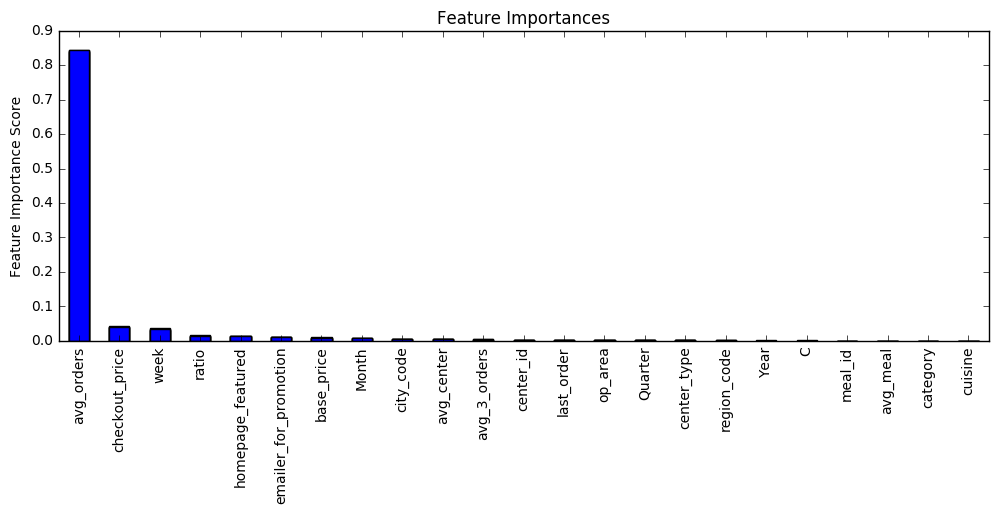

In [2158]:
best_predictors=best_variables(train,test,target)

## Plotting

In [45]:
sns.set(style="ticks")

In [105]:
df_

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,23,22,136.83,152.29,0,0,177,30,3,2,2,0,3
1,1018704,2,23,22,135.83,152.29,0,0,323,30,3,2,2,0,3
2,1196273,3,23,22,132.92,133.92,0,0,96,30,3,2,2,0,3
3,1116527,4,23,22,135.86,134.86,0,0,163,30,3,2,2,0,3
4,1343872,5,23,22,146.50,147.50,0,0,215,30,3,2,2,0,3
5,1493612,6,23,22,146.53,146.53,0,0,285,30,3,2,2,0,3
6,1110832,7,23,22,145.53,146.53,0,0,148,30,3,2,2,0,3
7,1461167,8,23,22,146.53,145.53,0,0,135,30,3,2,2,0,3
8,1102364,9,23,22,134.83,134.83,0,0,175,30,3,2,2,0,3
9,1018130,10,23,22,144.56,143.56,0,0,175,30,3,2,2,0,3


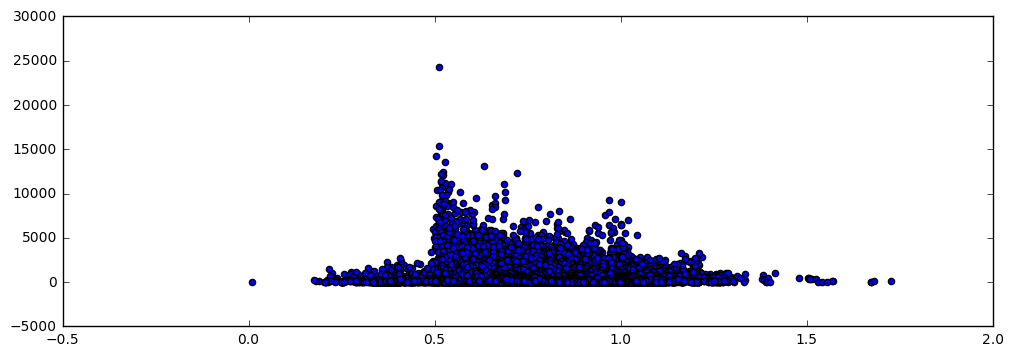

In [1597]:
plt.scatter(df_['ratio'],df_[target])

In [200]:
df_new

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine,avg_orders,avg_3_orders
41687,1417386,1,7,42,247.38,248.38,0,0,67,24,6,1,11,0,1,162,NaN
41688,1113213,2,7,42,98.00,248.38,1,0,148,24,6,1,11,0,1,162,NaN
41689,1019431,3,7,42,98.00,246.38,0,0,163,24,6,1,11,0,1,162,NaN
41690,1290447,33,7,42,150.35,150.35,0,0,148,24,6,1,11,0,1,162,NaN
41691,1081907,34,7,42,150.35,151.35,0,0,82,24,6,1,11,0,1,162,NaN
41692,1469872,35,7,42,153.26,155.26,0,0,161,24,6,1,11,0,1,162,NaN
41693,1175383,36,7,42,152.29,154.29,0,0,150,24,6,1,11,0,1,162,NaN
41694,1108922,37,7,42,153.26,153.26,0,0,202,24,6,1,11,0,1,162,NaN
41695,1222204,38,7,42,153.26,153.26,0,0,177,24,6,1,11,0,1,162,NaN
41696,1175266,39,7,42,152.32,153.32,0,0,123,24,6,1,11,0,1,162,NaN


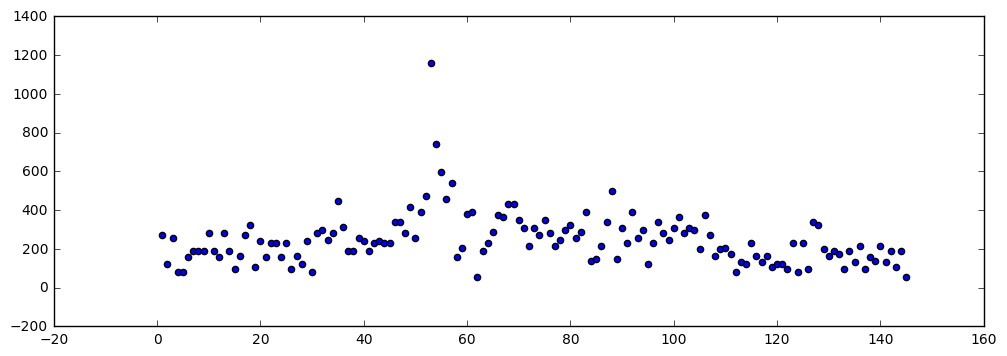

In [112]:
plt.hist(df_new['week'],df_new[target])

In [2222]:
import seaborn as sns
sns.pairplot(df_)

NameError: name 'sns' is not defined